In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
df = pd.read_csv("/content/drive/MyDrive/adult.csv")

In [67]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [69]:
df[df == ' ?'] = np.nan

In [70]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [71]:
df1 = df.dropna()

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
lb = LabelEncoder()

In [74]:
df1['salary'] = lb.fit_transform(df1['salary'])
df1['workclass'] = lb.fit_transform(df1['workclass'])
df1['education'] = lb.fit_transform(df1['education'])
df1['marital-status'] = lb.fit_transform(df1['marital-status'])
df1['occupation'] = lb.fit_transform(df1['occupation'])
df1['relationship'] = lb.fit_transform(df1['relationship'])
df1['race'] = lb.fit_transform(df1['race'])
df1['sex'] = lb.fit_transform(df1['sex'])
df1['country'] = lb.fit_transform(df1['country'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [75]:
df1 = df1.drop('fnlwgt',axis = 1)

The Correlation between fnlwgt and salary i s very low so we delete the fnlwgt column

In [76]:
corr = df1.corr()

In [77]:
corr

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.080540,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
education,-0.001111,0.017855,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education-num,0.043526,0.037833,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital-status,-0.276373,-0.034241,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699
capital-gain,0.080154,0.035350,0.030575,0.124416,-0.042418,0.022162,-0.058259,0.014353,0.048814,1.000000,-0.032229,0.080432,0.008530,0.221196


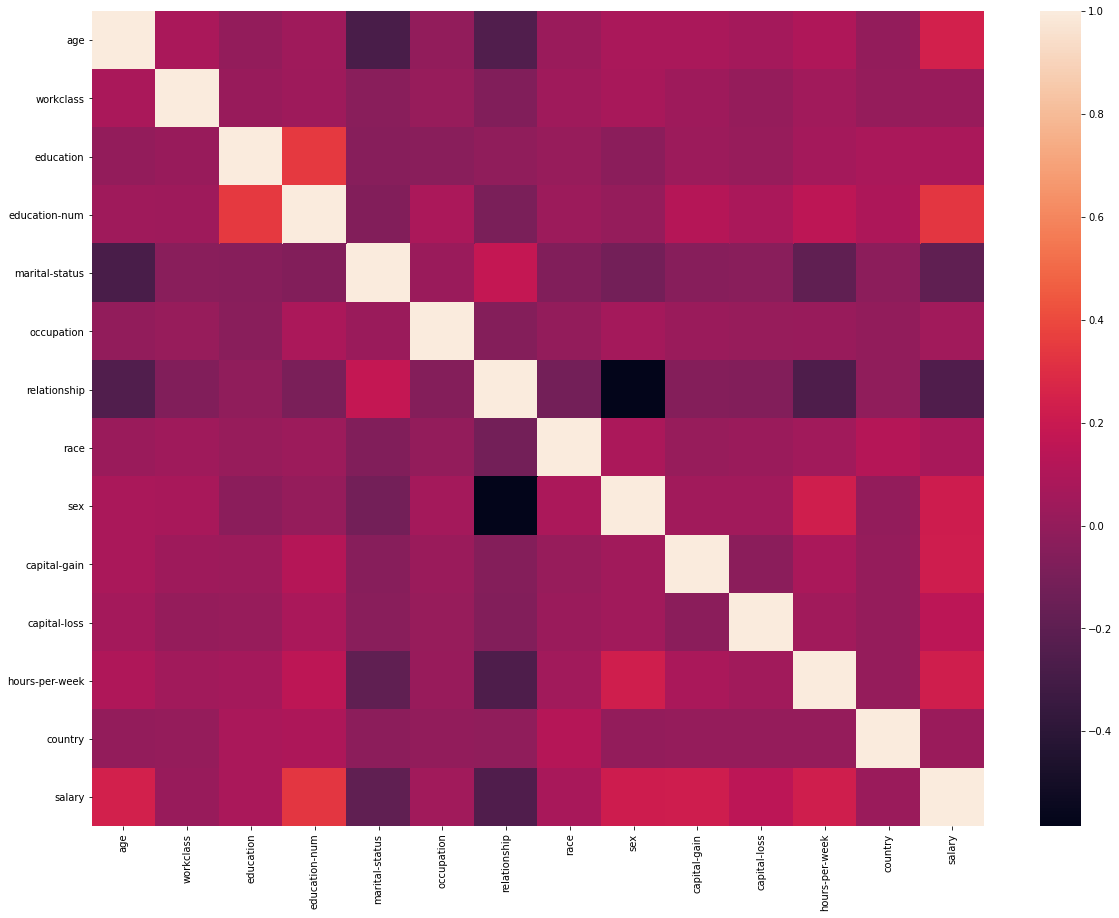

In [78]:
plt.figure(figsize=(20,15))
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


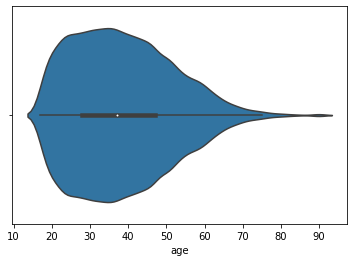

In [79]:
sns.violinplot('age',data = df1,hue = 'salary')
plt.show()

The maximun age group lie in between 20 to 55

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


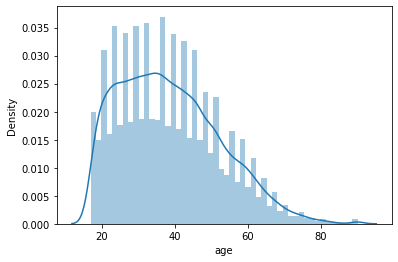

In [80]:
sns.distplot(df['age'])

Here the distribution is positively skiweed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


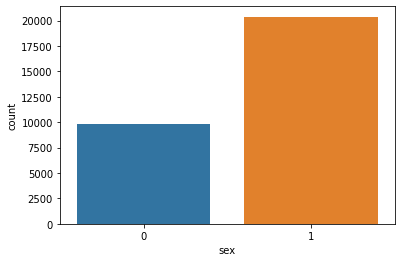

In [81]:
sns.countplot('sex',data=df1)

In the data number of men are greater than women.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


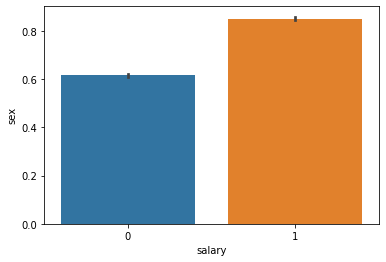

In [82]:
sns.barplot('salary','sex',data = df1)

average salary of men quite greater than women.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


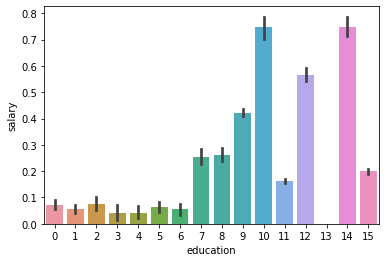

In [83]:
sns.barplot('education','salary',data = df1)

We can conclude that heigher the education heigher the salary.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


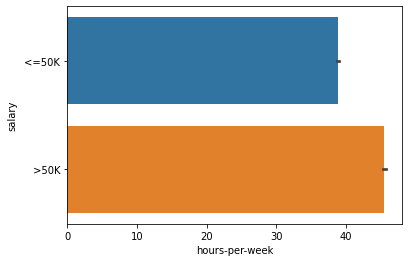

In [84]:
sns.barplot('hours-per-week','salary',data = df)

Heigher the hours-per-week heigher the salary.

In [85]:
X = df1.drop('salary',axis = 1)
y = df1['salary']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 13), (6033, 13), (24129,), (6033,))

In [86]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(random_state=0,n_jobs=-1)
xgb_fit = xgb.fit(X_train,y_train)
xgb_pred = xgb_fit.predict(X_test)
accuracy_score(xgb_pred,y_test)


0.8544670976297033

In [87]:
from sklearn.model_selection import GridSearchCV
##params_grid = {'n_estimators' : [200,300,400,500,600],
              # 'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
               #'max_depth' : [3,5,6,7,8]}
               

In [88]:
#xgbgrid = GridSearchCV(XGBClassifier(),params_grid)

In [89]:
##xgbgrid_fit = xgbgrid.fit(X_train,y_train)

In [90]:
##xgbgrid_fit.best_params_

In [91]:
xgb1 = XGBClassifier(learning_rate=0.2, max_depth=3,n_estimators=300,random_state=0)
xgb1_fit = xgb1.fit(X_train.values,y_train.values)
xgb1_pred = xgb1_fit.predict(X_test.values)

accuracy_score(xgb1_pred,y_test.values)


0.8693850488977292

In [92]:
X_test

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
2135,44,2,11,9,4,11,1,1,0,0,0,40,38
15639,21,2,15,10,4,0,3,4,1,0,0,20,38
29059,36,2,15,10,2,13,0,4,1,0,0,40,38
27523,30,4,8,11,0,2,1,4,1,0,0,49,38
9280,42,4,15,10,2,2,0,4,1,0,0,40,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,46,2,15,10,2,11,0,4,1,15024,0,40,38
5031,63,4,9,13,2,11,0,4,1,0,0,30,38
18671,45,2,0,6,2,2,0,4,1,0,0,60,38
10118,41,2,15,10,2,13,0,4,1,0,0,65,38


In [93]:
import pickle


In [94]:
with open('model_pickle','wb') as f:
  pickle.dump(xgb1,f)

In [95]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [96]:
mp

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [97]:
mp.predict(X_test.values)

array([0, 0, 0, ..., 0, 0, 0])